# Polynomial Regression Challenge - Model Presentation

## Project Overview
This project uses multiple features from the training dataset to predict a continuous target variable (`Label`). A combination of continuous and binary features from the dataset were preprocessed and modified using different regression approaches in order to create a prediction model.

# Installing required libraries such as numpy, pandas, matplotlib

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

## Dataset Summary
- **Training Data**: `train.csv`
- **Test Data**: `test.csv`

In [73]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [74]:
print("Train Data Overview:")
print(train_data.info())
print(train_data.describe())


print("\nTest Data Overview:")
print(test_data.info())
print(test_data.describe())

Train Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  231 non-null    float64
 1   Feature2  240 non-null    bool   
 2   Feature3  240 non-null    float64
 3   Feature4  227 non-null    float64
 4   Label     240 non-null    float64
dtypes: bool(1), float64(4)
memory usage: 7.9 KB
None
         Feature1     Feature3    Feature4        Label
count  231.000000   240.000000  227.000000   240.000000
mean    30.277218    69.706130   59.584543   308.476235
std     11.176810   187.923364   45.546105   464.394364
min     10.432014 -1129.060001    0.000000   -32.466802
25%     20.973077    23.892696   15.156651    28.887374
50%     29.870713    54.468361   53.978447   140.441039
75%     39.987688    91.713817  105.722662   373.604837
max     49.487028  1260.447274  127.999842  3253.238626

Test Data Overview:
<class 'pandas.core.fra

# Data Preprocessing
The following preprocessing steps were performed:

1. **Checking and handling missing values**: 
   - Missing values in `Feature1` and `Feature4` were imputed using their mean values.

2. **Binary Encoding**:
   - `Feature2` was converted to numeric (0 or 1) for model compatibility.

3. **Outlier Removal**: 
   - The Interquartile Range (IQR) method was used to detect and remove outliers from `Feature1`, `Feature3`, and `Feature4`.

4. **Feature Scaling**:
   - Features were scaled using `StandardScaler` to ensure proper model performance.

## Checking for missing values

In [75]:
print("\nMissing values in training data:")
print(train_data.isnull().sum())


Missing values in training data:
Feature1     9
Feature2     0
Feature3     0
Feature4    13
Label        0
dtype: int64


# Plot missing values

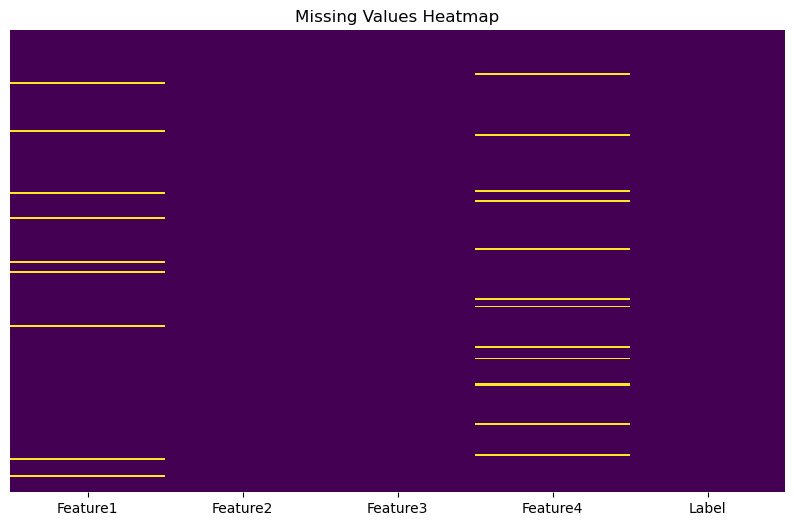

In [76]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

## Handling missing values by replacing them with their means
### Better to do this than just remove the values from the dataset

In [77]:
train_data['Feature1'].fillna(train_data['Feature1'].mean(), inplace=True)
train_data['Feature4'].fillna(train_data['Feature4'].mean(), inplace=True)
test_data['Feature1'].fillna(test_data['Feature1'].mean(), inplace=True)
test_data['Feature4'].fillna(test_data['Feature4'].mean(), inplace=True)

## Features:
- **Feature1**: Continuous numeric feature
- **Feature2**: Discrete (binary) feature 
- **Feature3**: Continuous numeric feature
- **Feature4**: Continuous numeric feature
- **Label**: Continuous target variable

## Converting Second Feature's data type to a more suitable and modelable data type

In [78]:
train_data['Feature2'] = train_data['Feature2'].astype(int)
test_data['Feature2'] = test_data['Feature2'].astype(int)

## Removing duplicate rows

In [79]:
train_data = train_data.drop_duplicates()

## Outlier Detection and Removal

In [80]:
show_data = train_data
Q1 = train_data[['Feature1', 'Feature3', 'Feature4']].quantile(0.25)
Q3 = train_data[['Feature1', 'Feature3', 'Feature4']].quantile(0.75)
IQR = Q3 - Q1
train_data = train_data[~((train_data[['Feature1', 'Feature3', 'Feature4']] < (Q1 - 1.5 * IQR)) | 
                          (train_data[['Feature1', 'Feature3', 'Feature4']] > (Q3 + 1.5 * IQR))).any(axis=1)]

# Plotting boxplots to visualize outliers before and after removal

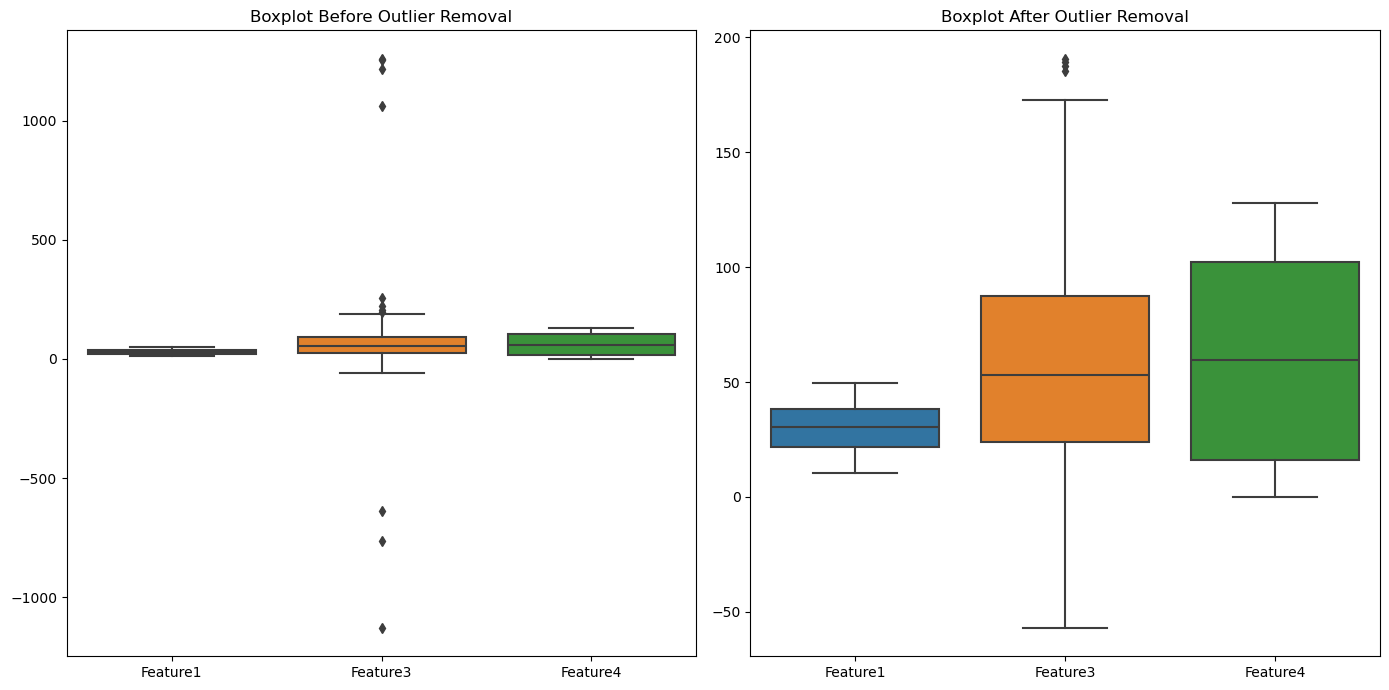

In [81]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.boxplot(data=show_data[['Feature1', 'Feature3', 'Feature4']])
plt.title('Boxplot Before Outlier Removal')

plt.subplot(1, 2, 2)
sns.boxplot(data=train_data[['Feature1', 'Feature3', 'Feature4']])
plt.title('Boxplot After Outlier Removal')

plt.tight_layout()
plt.show()

## Preparing features and target

In [82]:

X = train_data[['Feature1', 'Feature2', 'Feature3', 'Feature4']]
y = train_data['Label']
X_test = test_data[['Feature1', 'Feature2', 'Feature3', 'Feature4']]

## Feature Engineering with Polynomial Features

In [83]:
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X)
X_test_poly = poly.transform(X_test)

## Scaling

In [84]:
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)
X_test_poly_scaled = scaler.transform(X_test_poly)

# Model Selection and Hyperparameter Tuning

In [85]:
ridge_params = {'alpha': [0.02, 0.2, 2, 20, 200]}
lasso_params = {'alpha': [0.005, 0.005, 0.05, 0.5, 5]}

# Ridge Regression
## Trying to find out the best alpha value to use for the model

In [86]:
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='r2', cv=5)
ridge_grid.fit(X_poly_scaled, y)
print(f'Best Ridge alpha: {ridge_grid.best_params_}')
print(f'Ridge Regression R² Score (best): {ridge_grid.best_score_}')

Best Ridge alpha: {'alpha': 2}
Ridge Regression R² Score (best): 0.9661833096889367


# Lasso Regression
## Trying to find out the best alpha value to use for the model

In [87]:
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='r2', cv=5)
lasso_grid.fit(X_poly_scaled, y)

c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.140e+05, tolerance: 2.143e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.859e+05, tolerance: 2.109e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.738e+05, tolerance: 1.922e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.005, 0.05, 0.5, 5]}, scoring='r2')

# Model evaluation using Linear Regression

In [88]:
models = {
    'Linear Regression': LinearRegression()
}

for name, model in models.items():
    scores = cross_val_score(model, X_poly_scaled, y, cv=5, scoring='r2')
    print(f'{name} R² Score: {np.mean(scores)}')

Linear Regression R² Score: 0.9611254816221153


# Training and Predicting with the better model -> Ridge regression gave a better score here 

In [89]:
best_model = ridge_grid.best_estimator_
best_model.fit(X_poly_scaled, y)
y_test_pred = best_model.predict(X_test_poly_scaled)

# Creating a DataFrame for submission

In [90]:
submission_df = pd.DataFrame({
    'id': test_data.index,  
    'Label': y_test_pred
})

submission_df.to_csv('IMT2022543_submission_13.csv', index=False)